### A notebook for some random experiments

#### Tuning rf model (1d)

In [28]:
from utility import gen_data
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from matplotlib import pyplot as plt

N = 1000
ntest = 100
setting = 1
sigma = 0.5 if setting in [1, 2, 3, 4] else 0.2
cov = 0.1
dim = 10

`dim` has minor effect on the performance of linear model, but the impact is huge for rf.

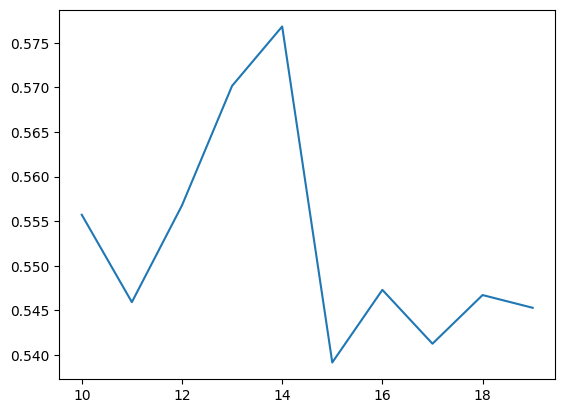

In [31]:
def get_rsq(dim):
    all_r = 0
    for t in range(10):
        Xtrain, Ytrain, _ = gen_data(setting, N, sigma, dim=dim)
        Xvalid, Yvalid, _ = gen_data(setting, N, sigma, dim=dim)
        Xtest, Ytest, _ = gen_data(setting, ntest, sigma, dim=dim)
        
        if setting == 1:
            transf = lambda x : np.column_stack((x, x[:, 0] * x[:, 1], x[:, 0] * x[:, 2], x[:, 1] * x[:, 2], x[:, 0] * x[:, 1] * x[:, 2]))
        if setting in [2, 3, 4]:
            transf = lambda x : np.column_stack((x, x[:, 0] * x[:, 1]))
        if setting == 5:
            transf = lambda x : np.column_stack((x, x[:, 0] * x[:, 1], x[:, 0] * x[:, 3], x[:, 1] * x[:, 3], x[:, 0] * x[:, 1] * x[:, 3]))
        if setting in [6, 7, 8]:
            transf = lambda x : np.column_stack((x, x[:, 0] * x[:, 1]))
        Xtrain = transf(Xtrain)
        Xvalid = transf(Xvalid)
        Xtest = transf(Xtest)

        lin = LinearRegression()
        lin.fit(Xtrain, 1 * (Ytrain > 0))
        Ypred = lin.predict(Xtest)
        all_r += r2_score(1 * (Ytest > 0), Ypred)
    return all_r / 10

res = []
xrange = np.arange(10, 20, 1)
for i in xrange:
    res.append(get_rsq(i))
plt.plot(xrange, res)
plt.show()

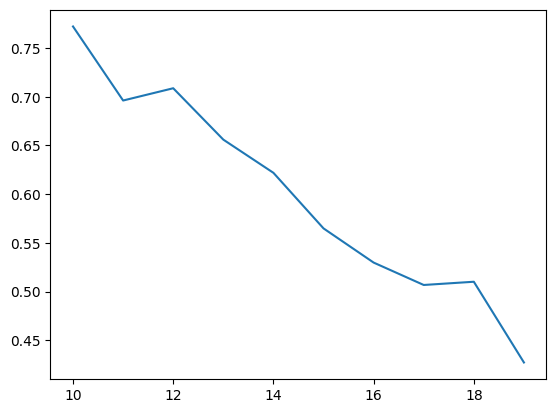

In [30]:
def get_rsq(dim):
    all_r = 0
    r = []
    for t in range(10):
        Xtrain, Ytrain, _ = gen_data(setting, N, sigma, dim=dim)
        Xvalid, Yvalid, _ = gen_data(setting, N, sigma, dim=dim)
        Xtest, Ytest, _ = gen_data(setting, ntest, sigma, dim=dim)

        rf = RandomForestRegressor(n_estimators=50, max_depth=20, max_features=10, random_state=0)

        rf.fit(Xtrain, 1 * (Ytrain > 0))

        Ypred = rf.predict(Xtest) 

        all_r += r2_score(1 * (Ytest > 0), Ypred)
        r.append(r2_score(1 * (Ytest > 0), Ypred))
    return all_r / 10

res = []
xrange = np.arange(10, 20, 1)
for i in xrange:
    res.append(get_rsq(i))
plt.plot(xrange, res)
plt.show()

In [134]:
setting = 2
dim = 10
all_r = 0

for t in range(10):
    Xtrain, Ytrain, _ = gen_data(setting, N, sigma, dim=dim)
    Xvalid, Yvalid, _ = gen_data(setting, N, sigma, dim=dim)
    Xtest, Ytest, _ = gen_data(setting, ntest, sigma, dim=dim)

    if setting == 1:
        rf = RandomForestRegressor(n_estimators=50, max_depth=20, max_features=10, random_state=0)
    if setting == 5:
        rf = RandomForestRegressor(n_estimators=50, max_depth=20, max_features=10, min_samples_leaf=20, min_samples_split=20, random_state=0)
    if setting == 2:
        rf = RandomForestRegressor(n_estimators=50, max_depth=20, max_features=10, random_state=0)
    if setting == 6:
        rf = RandomForestRegressor(n_estimators=50, max_depth=20, max_features=10, random_state=0)

    rf.fit(Xtrain, 1 * (Ytrain > 0))

    Ypred = rf.predict(Xtest) 

    all_r += r2_score(1 * (Ytest > 0), Ypred)
all_r / 10

0.5394483326776555

#### Tuning mlp model (1d)

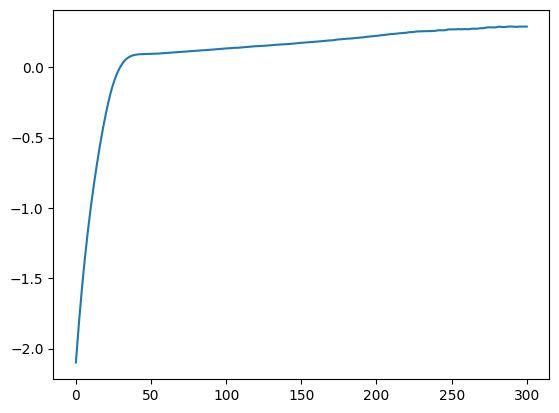

0.5207365291631905


In [175]:
from utility import gen_data
from sklearn.neural_network import MLPRegressor

setting = 2
dim = 10
sigma = 0.5 if setting in [1, 2, 3, 4] else 0.2
N = 1000
all_r = 0

for t in range(10):
    Xtrain, Ytrain, mu_train = gen_data(setting, N, sigma, dim=dim)
    Xvalid, Yvalid, mu_valid = gen_data(setting, N, sigma, dim=dim)
    Xtest, Ytest, _ = gen_data(setting, ntest, sigma, dim=dim)

    if setting == 1:
        mlp = MLPRegressor(hidden_layer_sizes=(32, ) * 4, random_state=0, alpha=0.5, max_iter=1000, learning_rate_init=1e-4, early_stopping=True, tol=1e-6)
    if setting == 2:
        mlp = MLPRegressor(hidden_layer_sizes=(32, ) * 4, random_state=0, alpha=0.5, max_iter=1000, learning_rate_init=1e-4, early_stopping=True, tol=1e-6)
    if setting == 5:
        mlp = MLPRegressor(hidden_layer_sizes=(32, ) * 4, random_state=0, alpha=2, max_iter=1000, learning_rate_init=1e-4, early_stopping=True, tol=1e-6)
    if setting == 6:
        mlp = MLPRegressor(hidden_layer_sizes=(32, ) * 4, random_state=0, alpha=0.2, max_iter=1000, learning_rate_init=1e-4, early_stopping=True, tol=1e-6)
    mlp.fit(Xtrain, 1 * (Ytrain > 0))

    if t == 9:
        plt.plot(mlp.validation_scores_)
        plt.show()

    Ypred = mlp.predict(Xtest)
    all_r += r2_score(1 * (Ytest > 0), Ypred)

print(all_r / 10)

#### Testing setting 9 - CQR

In [1]:
from utils import gen_data, BH, Bonferroni
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
import numpy as np

N = 1000
setting = 9
Xtrain, Ytrain, mu_train = gen_data(setting, N, 0.5, dim=1)
Xvalid, Yvalid, mu_valid = gen_data(setting, N, 0.5, dim=1)

# scaling
# s = StandardScaler()
# Xtrain = s.fit_transform(Xtrain)
# s = StandardScaler()
# Xvalid = s.fit_transform(Xvalid)

# MAV = np.mean(np.absolute(Ytrain), axis=0)
# Ytrain /= MAV  
# MAV = np.mean(np.absolute(Yvalid), axis=0)
# Yvalid /= MAV  

rf = RandomForestRegressor(n_estimators=1000, max_features=1, min_samples_leaf=30)
rf.fit(Xtrain, Ytrain)
Ypred = rf.predict(Xvalid)
print(r2_score(Yvalid, Ypred))

0.4050670968864126


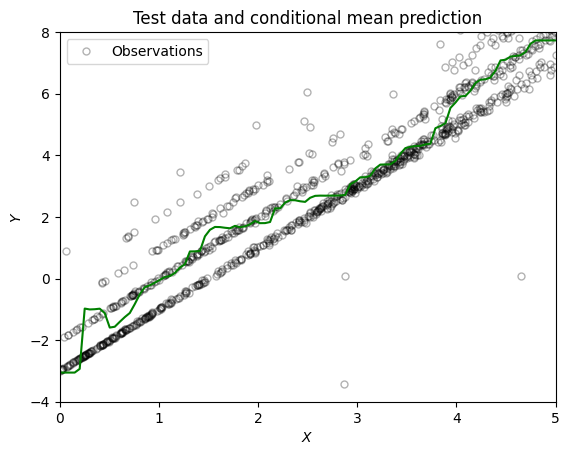

In [2]:
fig = plt.figure()
plt.plot(Xvalid, Yvalid, 'k.', alpha = 0.3, markersize=10,
         fillstyle='none', label=u'Observations')

Yplot_pred = []
for i in np.linspace(0, 5, 100):
    Yplot_pred.append(rf.predict([[i]]))
plt.plot(np.linspace(0, 5, 100), Yplot_pred, color='green')

plt.legend()
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Test data and conditional mean prediction')
plt.ylim((-4, 8))
plt.xlim((0, 5))
plt.show()

In [ ]:
from utils import BH
Xcalib, Ycalib, mu_calib = gen_data(setting, N, 0.5, dim=1)
Xtest, Ytest, _ = gen_data(setting, N, 0.5, dim=1)

calib_scores0 = - rf.predict(Xcalib)  
calib_scores_2clip = 1000 * (Ycalib > 0) - rf.predict(Xcalib) 

Ypred = rf.predict(Xtest) 
test_scores = -Ypred

BH_sub_sel, BH_sub_p = BH(calib_scores0, test_scores, 0.1)
BH_clip_sel, BH_clip, p = BH(calib_scores_2clip, test_scores, 0.1)



In [3]:
from quantile_forest import RandomForestQuantileRegressor

rf_q = RandomForestQuantileRegressor(n_estimators=1000, min_samples_leaf=40, max_features=1)
rf_q.fit(Xtrain, Ytrain)

RandomForestQuantileRegressor(max_features=1, min_samples_leaf=40,
                              n_estimators=1000)

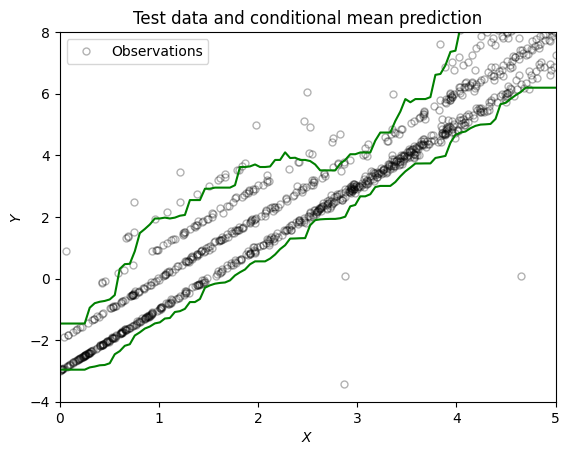

In [4]:
fig = plt.figure()
plt.plot(Xvalid, Yvalid, 'k.', alpha = 0.3, markersize=10,
         fillstyle='none', label=u'Observations')

Yplot_pred_lo = []
Yplot_pred_hi = []
for i in np.linspace(0, 5, 100):
    Yplot_pred_lo.append(rf_q.predict([[i]], quantiles=0.05))
    Yplot_pred_hi.append(rf_q.predict([[i]], quantiles=0.95))
plt.plot(np.linspace(0, 5, 100), Yplot_pred_lo, color='green')
plt.plot(np.linspace(0, 5, 100), Yplot_pred_hi, color='green')

plt.legend()
plt.xlabel('$X$')
plt.ylabel('$Y$')
plt.title('Test data and conditional mean prediction')
plt.ylim((-4, 8))
plt.xlim((0, 5))
plt.show()

#### Testing 2d settings

In [5]:
from utility import gen_data_2d
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

N = 1000
ntest = 1000
setting = 2
sigma = 0.5 if setting in [1, 2] else 0.2
cov = 0.1

Xtrain, Ytrain, _, _, _ = gen_data_2d(setting, N, sigma, cov, dim=20)
Xvalid, Yvalid, _, _, _ = gen_data_2d(setting, N, sigma, cov, dim=20)
Xtest, Ytest, _, _, _ = gen_data_2d(setting, ntest, sigma, cov, dim=20)

In [119]:
rf = RandomForestRegressor(n_estimators=50, max_depth=20, max_features=10, min_samples_leaf=1, min_samples_split=7, bootstrap=False)

rf.fit(Xtrain, Ytrain)
print(r2_score(Yvalid, rf.predict(Xvalid)))

0.7488959942764272


#### Tuning rf model (2d)

In [141]:
from utility import gen_data_2d
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from matplotlib import pyplot as plt

N = 1000
ntest = 100
setting = 2
sigma = 0.5 if setting in [1, 2] else 0.2
cov = 0.1
dim = 10

all_r = 0 

for t in range(10):
    Xtrain, Ytrain, _, _, _ = gen_data_2d(setting, N, sigma, cov, dim=dim)
    Xtest, Ytest, _, _, _ = gen_data_2d(setting, ntest, sigma, cov, dim=dim)
    if setting in [1, 2]:
        transf = lambda x : np.column_stack((x, x[:, 0] * x[:, 1], x[:, 1] * x[:, 2]))
    if setting == 5:
        transf = lambda x : np.column_stack((x, x[:, 0] * x[:, 1], x[:, 1] * x[:, 2], x[:, 0] * x[:, 2], x[:, 0] * x[:, 1] * x[:, 2],
                                                x[:, 0] * x[:, 1], x[:, 1] * x[:, 3], x[:, 0] * x[:, 3], x[:, 0] * x[:, 1] * x[:, 3]))
    if setting == 6:
        transf = lambda x : np.column_stack((x, x[:, 0] * x[:, 1], x[:, 1] * x[:, 3]))

    Xtrain = transf(Xtrain)
    Xtest = transf(Xtest)

    lin = LinearRegression()
    lin.fit(Xtrain, Ytrain)
    Ypred = lin.predict(Xtest) 

    all_r += r2_score(Ytest, Ypred)
all_r / 10

0.8691077197912616

In [121]:
N = 1000
ntest = 100
setting = 4
sigma = 0.5 if setting in [1, 2] else 0.2
cov = 0.1
dim = 10

all_r = 0

for t in range(10):
    Xtrain, Ytrain, _, _, _ = gen_data_2d(setting, N, sigma, cov, dim=dim)
    Xvalid, Yvalid, _, _, _ = gen_data_2d(setting, N, sigma, cov, dim=dim)
    Xtest, Ytest, _, _, _ = gen_data_2d(setting, ntest, sigma, cov, dim=dim)

    if setting == 1:
        rf = RandomForestRegressor(n_estimators=50, max_depth=20, max_features=10, min_samples_leaf=13, min_samples_split=13, random_state=0)
    if setting == 3:
        rf = RandomForestRegressor(n_estimators=50, max_depth=20, max_features=10, random_state=0)
    if setting == 2:
        rf = RandomForestRegressor(n_estimators=50, max_depth=20, max_features=10, random_state=0)
    if setting == 4:
        rf = RandomForestRegressor(n_estimators=50, max_depth=20, max_features=10, random_state=0)

    rf.fit(Xtrain, Ytrain)

    Ypred = rf.predict(Xtest) 

    all_r += r2_score(Ytest, Ypred)
all_r / 10

0.7206187665359595

#### Tuning mlp model (2d)

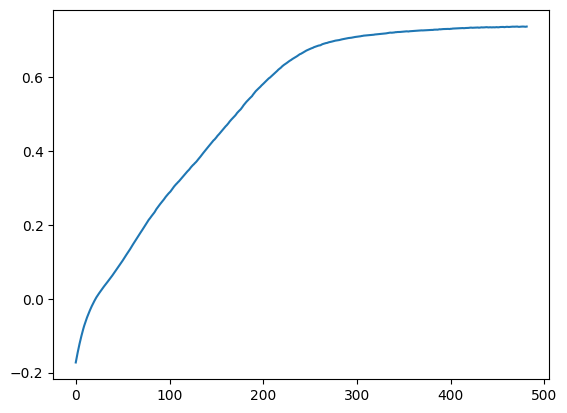

0.759108278615092


In [164]:
from utility import gen_data_2d
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from matplotlib import pyplot as plt

N = 1000
ntest = 100
setting = 4
sigma = 0.5 if setting in [1, 2] else 0.2
cov = 0.1
dim = 10

all_r = 0 

for t in range(10):
    Xtrain, Ytrain, _, _, _ = gen_data_2d(setting, N, sigma, cov, dim=dim)
    Xvalid, Yvalid, _, _, _ = gen_data_2d(setting, N, sigma, cov, dim=dim)
    Xtest, Ytest, _, _, _ = gen_data_2d(setting, ntest, sigma, cov, dim=dim)

    if setting == 1:
        mlp = MLPRegressor(hidden_layer_sizes=(32, ) * 4, random_state=0, alpha=0.1, max_iter=1000, learning_rate_init=1e-4, early_stopping=True, tol=1e-6)
    if setting == 2:
        mlp = MLPRegressor(hidden_layer_sizes=(32, ) * 4, random_state=0, alpha=0.1, max_iter=1000, learning_rate_init=1e-4, early_stopping=True, tol=1e-6)
    if setting == 3:
        mlp = MLPRegressor(hidden_layer_sizes=(32, ) * 4, random_state=0, alpha=0.1, max_iter=1000, learning_rate_init=1e-4, early_stopping=True, tol=1e-6)
    if setting == 4:
        mlp = MLPRegressor(hidden_layer_sizes=(32, ) * 4, random_state=0, alpha=0.1, max_iter=1000, learning_rate_init=1e-4, early_stopping=True, tol=1e-6)
    mlp.fit(Xtrain, Ytrain)

    if t == 9:
        plt.plot(mlp.validation_scores_)
        plt.show()

    Ypred = mlp.predict(Xtest)
    all_r += r2_score(Ytest, Ypred)

print(all_r / 10)

#### p-values and power of 1d settings

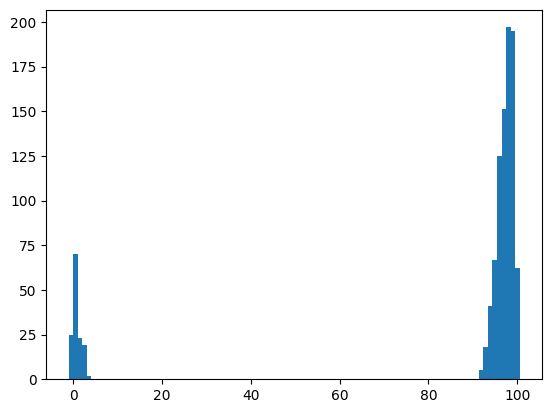

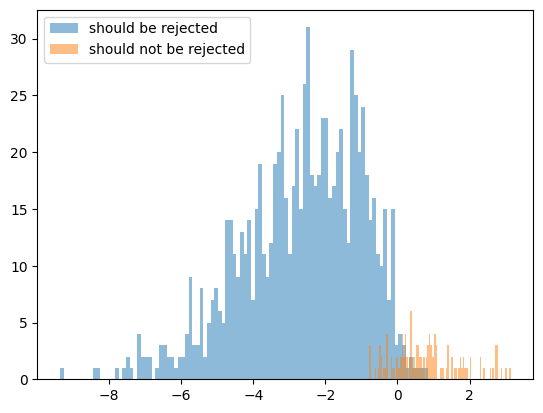

0.877


In [13]:
from utility import gen_data, BH
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from prediction_model import OracleRegressor
from sklearn.metrics import r2_score
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

N = 1000
ntest = 1000
setting = 3
sigma = 0.5 if setting in [1, 2] else 0.2
cov = 0
dim = 10

all_r = 0 

Xtrain, Ytrain, _ = gen_data(setting, N, sigma, dim=dim)
Xcalib, Ycalib, _ = gen_data(setting, N, sigma, dim=dim)
Xtest, Ytest, _ = gen_data(setting, ntest, sigma, dim=dim)

reject = np.where((Ytest > 0))
notreject = np.where((Ytest <= 0))

mlp = OracleRegressor(setting)
mlp.fit(Xtrain, Ytrain)
Ypred_calib = mlp.predict(Xcalib)
Ypred = mlp.predict(Xtest)

calib_scores = Ycalib - Ypred_calib                                            # BH_res
calib_scores0 = - Ypred_calib                                                  # BH_sub
calib_scores_2clip = 100 * ((Ycalib > 0)) - Ypred_calib

test_scores = - Ypred

plt.hist(calib_scores_2clip, bins=100)
plt.show()

plt.hist(test_scores[reject], bins=100, alpha=0.5, label='should be rejected')
plt.hist(test_scores[notreject], bins=100, alpha=0.5, label='should not be rejected')
plt.legend()
plt.show()

print(len(reject[0]) / len(test_scores))

In [26]:
print(calib_scores)
BH(calib_scores, test_scores, 0.1, True)

[ 9.69229393e-01 -1.05238877e-01  3.00498162e-01 -2.50596519e-01
 -1.08614369e-01  4.91872413e-02  3.02128510e-01  3.05678333e-02
  1.85636050e-01  1.61264113e-01  3.89839984e-01 -2.88017632e-01
 -1.52196743e-01  6.52943447e-01 -6.29669256e-02 -4.36080901e-01
  3.16884466e-01  2.52103259e-03 -3.64452132e-01  6.26092672e-01
  6.73373911e-02  4.83481361e-01 -2.25553274e-01 -1.37547115e-01
  1.79883239e-01 -3.66769292e-02 -4.78696602e-01 -2.52553842e-01
  2.55488514e-01 -1.20179704e-01 -6.21113244e-01  8.10481581e-01
  1.07565032e+00 -2.96732457e-01  6.36550814e-01 -4.79291446e-01
 -9.65673789e-01 -8.39233278e-01 -1.30455015e-01  1.64971893e-01
  3.90454685e-01 -1.01679695e-01  9.17967298e-01 -6.00187575e-01
  2.57959946e-04  1.29453375e-01  5.91540813e-01  4.83267833e-01
  4.21856400e-02  3.69852630e-01  1.65191527e-01 -3.37475626e-01
 -2.08000644e-01 -2.39483804e-01 -8.17031451e-01  1.81040439e-01
 -2.10189084e-01 -2.66004583e-01 -7.27040326e-01  2.17849503e-01
 -1.25986216e-01  6.66694

(array([ 10, 658, 984, 347, 996, 951, 651, 791, 896, 442, 881, 845, 730,
         41, 391, 819, 572, 692, 838, 136, 324, 754, 117, 624,   3, 411,
        449,  68,  96, 238, 330, 913, 501,  17, 293, 410,  21, 890, 421,
        724, 649, 593, 679, 232, 241, 118, 414, 149, 274, 206, 938, 212,
        320, 918, 164, 636, 912,  43, 398, 731, 499, 789, 885, 436, 326,
        770, 858, 597, 168, 611,  19, 102, 253, 269, 709, 942, 739, 872,
        187, 159, 546, 129, 956, 191, 777, 745, 193, 648, 392, 531, 526,
        383, 926, 173, 826, 712, 915, 629, 406, 343,  60, 322, 810, 782,
        328,  82, 548, 675,  83, 296, 757, 308, 728, 365, 298,  59,  50,
        583, 995, 726, 570, 980, 472, 874, 695, 897, 865, 465, 814, 272,
        216, 568, 690, 828, 656, 360, 514, 311, 556, 669, 871,  74,  86,
         90, 452, 138, 603, 855, 178, 265, 652, 412, 203, 416, 119, 925,
        302, 794, 924, 616, 975, 796, 580, 775, 103, 533, 929, 262, 500,
         35, 633, 408, 134, 717, 710,  40, 987, 886

#### p-values and powers of 2d settings

In [2]:
def dist(Y):
    l = []
    for i in range(len(Y)):
        if Y[i, 0] >= 0 and Y[i, 1] >= 0:
            l.append(max(Y[i, 0], Y[i, 1]))
        # elif Y[i, 0] < 0 and Y[i, 1] < 0:
        #     l.append(-np.sqrt(Y[i, 0] ** 2 + Y[i, 1] ** 2))
        else:
            l.append(min(Y[i, 0], Y[i, 1]))
    return np.array(l)

r^2: 0.7779980319254288
0.265
0.05128205128205128 0.13962264150943396


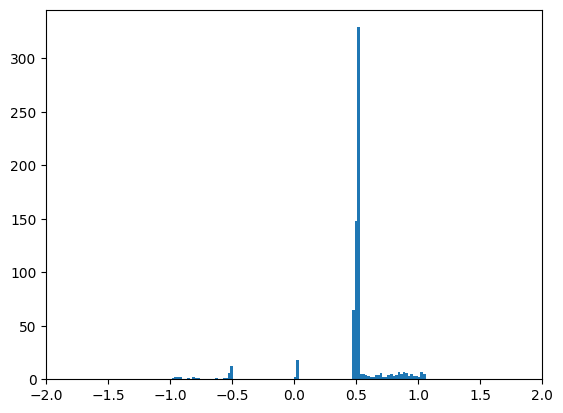

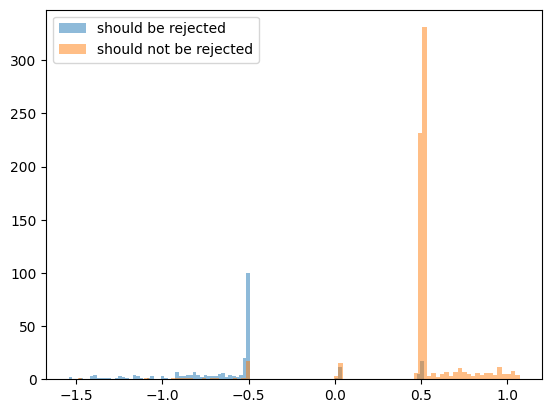

In [99]:
from utility import gen_data_2d, BH
from prediction_model import OracleRegressor2d, TrueRegressor2d
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd

N = 1000
ntest = 1000
setting = 5
sigma = 0.1 if setting in [1, 2] else 0.1
cov = 0
dim = 10

all_r = 0 

Xtrain, Ytrain, _, _, _ = gen_data_2d(setting, N, sigma, cov, dim=dim)
Xcalib, Ycalib, _, _, _ = gen_data_2d(setting, N, sigma, cov, dim=dim)
Xtest, Ytest, _, _, _ = gen_data_2d(setting, ntest, sigma, cov, dim=dim)

reject = np.where((Ytest[:, 0] > 0) & (Ytest[:, 1] > 0))
notreject = np.where((Ytest[:, 0] <= 0) | (Ytest[:, 1] <= 0))

mlp = OracleRegressor2d(setting)
mlp.fit(Xtrain, Ytrain)
Ypred_calib = mlp.predict(Xcalib)
Ypred = mlp.predict(Xtest)

print(f"r^2: {r2_score(Ytest, Ypred)}")

calib_scores = dist(Ycalib) - dist(Ypred_calib)                                       # BH_res
calib_scores0 = - dist(Ypred_calib)                                                   # BH_sub
calib_scores_2clip = 1000 * ((Ycalib[:, 0] > 0) & (Ycalib[:, 1] > 0)) - dist(Ypred_calib)  

test_scores = - dist(Ypred)

print(len(reject[0]) / len(test_scores))

BH_2clip = BH(calib_scores_2clip, test_scores, 0.1)
true_null = sum((Ytest[:, 0] > 0) & (Ytest[:, 1] > 0))
if len(BH_2clip) == 0:
    BH_2clip_fdp = 0
    BH_2clip_power = 0
else:
    BH_2clip_fdp = np.sum((Ytest[BH_2clip][:, 0] <= 0) | (Ytest[BH_2clip][:, 1] <= 0)) / len(BH_2clip)
    BH_2clip_power = np.sum((Ytest[BH_2clip][:, 0] > 0) & (Ytest[BH_2clip][:, 1] > 0)) / true_null if true_null != 0 else 0
print(BH_2clip_fdp, BH_2clip_power)

plt.hist(calib_scores_2clip[np.where(calib_scores_2clip < 5)], bins=100)
plt.xlim(-2, 2)
plt.show()

plt.hist(test_scores[reject], bins=100, alpha=0.5, label='should be rejected')
plt.hist(test_scores[notreject], bins=100, alpha=0.5, label='should not be rejected')
plt.legend()
plt.show()